In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-30.979440406772483 119.59368862252035
71.22842699005722 -67.24464656452884
81.97264477785376 -167.6111488683186
-60.41278733616825 149.50325598252334
-62.381333946953944 129.4727571787423
-42.95617584163333 154.9620702021234
48.325373963024674 112.82089491630705
26.396686603927762 38.5654745213086
-74.73223871253653 -85.65932871078057
-67.37789887441885 84.30754218899159
59.57924135219315 123.75998529531682
80.57604098801403 -97.03240010863765
-7.247181384000555 32.09279830148756
47.67700631452294 27.572737534551294
3.929613921890379 -42.693642876205416
87.79953749993246 137.2266113836739
-19.835227569793176 -7.466388249520918
0.6088740073123944 -141.87723662511746
-8.358845643255677 31.198870824562817
79.29219366698229 25.81726567313649
-23.398516527050717 91.19143162108406
45.41059412405386 -100.97906692119054
-72.85330047865988 99.93907583585877
41.00537227212189 -21.932047260662415
-26.82737087242586 8.46177319463871
88.65192369847674 -11.061867142677698
-64.18161111787592 33.1585

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, 
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

northam au
clyde river ca
barrow us
hobart au
new norfolk au
hobart au
kyra ru
umm lajj sa
punta arenas cl
busselton au
nizhniy kuranakh ru
thompson ca
inyonga tz
glodeni md
carutapera br
nizhneyansk ru
jamestown sh
atuona pf
matai tz
honningsvag no
labuhan id
pierre us
albany au
vila franca do campo pt
luderitz na
illoqqortoormiut gl
port elizabeth za
karauzyak uz
upernavik gl
bluff nz
murdochville ca
tuktoyaktuk ca
nanortalik gl
ladario br
torbay ca
saint-joseph re
rikitea pf
inderborskiy kz
severo-kurilsk ru
sentyabrskiy ru
torbay ca
svetlaya ru
provideniya ru
faya td
huarmey pe
ust-tsilma ru
marsh harbour bs
fare pf
port elizabeth za
kismayo so
vaini to
pula hr
burnie au
rikitea pf
busselton au
baruun-urt mn
vaini to
mataura pf
derzhavinsk kz
avera pf
devonport au
tumannyy ru
qaanaaq gl
albany au
polson us
rawson ar
upernavik gl
miri my
saldanha za
atuona pf
fairbanks us
rikitea pf
punta arenas cl
verkhnevilyuysk ru
dikson ru
cuautepec mx
barcelos br
hermanus za
illoqqortoormiut gl

taolanaro mg
puerto ayora ec
qaanaaq gl
presov sk
bluff nz
tiksi ru
tuktoyaktuk ca
rikitea pf
attawapiskat ca
puerto madryn ar
ketchikan us
sentyabrskiy ru
kedgwick ca
adrar dz
chokurdakh ru
san nicolas ph
rio gallegos ar
gat ly
cidreira br
laguna br
belushya guba ru
lagoa pt
attawapiskat ca
port elizabeth za
geraldton ca
provideniya ru
dien bien vn
ushuaia ar
vaitupu wf
vaini to
grafton au
bluff nz
north bend us
paamiut gl
north platte us
chokurdakh ru
cidreira br
dikson ru
bireun id
lorengau pg
lompoc us
hermanus za
port alfred za
doctor pedro p. pena py
cape town za
mar del plata ar
punta arenas cl
ponta do sol cv
izmir tr
ishigaki jp
hermanus za
mar del plata ar
pandan ph
haines junction ca
port alfred za
chifeng cn
thompson ca
bilma ne
sagua la grande cu
nikolskoye ru
dennery lc
attawapiskat ca
butaritari ki
bluff nz
ushuaia ar
nizhneyansk ru
codrington ag
vaini to
vaini to
taolanaro mg
butaritari ki
huangmei cn
katsuura jp
bredasdorp za
punta arenas cl
kimberley ca
portland au
eu

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [9]:
import requests
requests.__version__

'2.28.1'

In [10]:
# Import reuqests library and api key
import requests

from config import weather_api_key

# Build the url for the OpenWeatherMap with URL + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | northam
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | kyra
Processing Record 7 of Set 1 | umm lajj
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | nizhniy kuranakh
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | inyonga
Processing Record 13 of Set 1 | glodeni
Processing Record 14 of Set 1 | carutapera
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | matai
Processing Record 19 of Set 1 | honningsvag
Processing Record 20 of Set 1 | labuhan
Processing Record 21 of Set 1 | pierre
Processing Record 22 of Set 1 | albany
Processing R

Processing Record 35 of Set 4 | lakki marwat
Processing Record 36 of Set 4 | westport
Processing Record 37 of Set 4 | andijon
Processing Record 38 of Set 4 | los llanos de aridane
Processing Record 39 of Set 4 | marawi
Processing Record 40 of Set 4 | lakes entrance
Processing Record 41 of Set 4 | lasem
Processing Record 42 of Set 4 | ancud
Processing Record 43 of Set 4 | aykhal
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | jatiroto
Processing Record 46 of Set 4 | alice springs
Processing Record 47 of Set 4 | sisimiut
Processing Record 48 of Set 4 | sao filipe
Processing Record 49 of Set 4 | camocim
Processing Record 50 of Set 4 | baglan
Processing Record 1 of Set 5 | cedar city
Processing Record 2 of Set 5 | labutta
City not found. Skipping...
Processing Record 3 of Set 5 | katsuura
Processing Record 4 of Set 5 | zhigansk
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | dryden
Processing Record 7 of Set 5 | coos bay
Processing Record

Processing Record 28 of Set 8 | qasigiannguit
Processing Record 29 of Set 8 | chagda
City not found. Skipping...
Processing Record 30 of Set 8 | verkhoyansk
Processing Record 31 of Set 8 | san patricio
Processing Record 32 of Set 8 | gat
Processing Record 33 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 34 of Set 8 | bereda
Processing Record 35 of Set 8 | gamba
Processing Record 36 of Set 8 | suixi
Processing Record 37 of Set 8 | boa vista
Processing Record 38 of Set 8 | constitucion
Processing Record 39 of Set 8 | narsaq
Processing Record 40 of Set 8 | ahipara
Processing Record 41 of Set 8 | pochutla
Processing Record 42 of Set 8 | tsiroanomandidy
Processing Record 43 of Set 8 | honiara
Processing Record 44 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 45 of Set 8 | krasnoarmeysk
Processing Record 46 of Set 8 | shakiso
Processing Record 47 of Set 8 | senanga
Processing Record 48 of Set 8 | muros
Processing Record 49 of Set 8 | casablanca
Proc

Processing Record 16 of Set 12 | barbar
City not found. Skipping...
Processing Record 17 of Set 12 | kaya
Processing Record 18 of Set 12 | ambovombe
Processing Record 19 of Set 12 | waipawa
Processing Record 20 of Set 12 | ternuvate
Processing Record 21 of Set 12 | skibbereen
Processing Record 22 of Set 12 | tupelo
Processing Record 23 of Set 12 | vrangel
Processing Record 24 of Set 12 | nishihara
Processing Record 25 of Set 12 | sovik
Processing Record 26 of Set 12 | san ignacio
Processing Record 27 of Set 12 | dunedin
Processing Record 28 of Set 12 | aksarka
Processing Record 29 of Set 12 | sergiyevsk
Processing Record 30 of Set 12 | bokspits
City not found. Skipping...
Processing Record 31 of Set 12 | leshukonskoye
Processing Record 32 of Set 12 | erenhot
Processing Record 33 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 34 of Set 12 | qeshm
Processing Record 35 of Set 12 | lalibela
Processing Record 36 of Set 12 | yining
Processing Record 37 of Set 12 | henties

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Northam,51.0333,-4.2167,52.39,96,100,17.76,GB,2023-02-02 12:03:00
1,Clyde River,70.4692,-68.5914,-28.97,68,75,12.66,CA,2023-02-02 12:03:00
2,Barrow,71.2906,-156.7887,-5.78,77,0,16.11,US,2023-02-02 12:03:00
3,Hobart,-42.8794,147.3294,53.46,84,75,8.05,AU,2023-02-02 12:00:28
4,New Norfolk,-42.7826,147.0587,53.10,77,100,2.01,AU,2023-02-02 12:03:01
5,Kyra,49.5776,111.9753,-0.24,91,77,5.64,RU,2023-02-02 12:03:01
6,Umm Lajj,25.0213,37.2685,69.57,44,4,10.67,SA,2023-02-02 12:03:02
7,Punta Arenas,-53.1500,-70.9167,51.91,82,0,3.44,CL,2023-02-02 11:59:32
8,Busselton,-33.6500,115.3333,78.08,43,1,12.95,AU,2023-02-02 12:03:02
9,Nizhniy Kuranakh,58.8353,125.4869,0.59,95,100,8.34,RU,2023-02-02 12:03:03


In [14]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Northam,GB,2023-02-02 12:03:00,51.0333,-4.2167,52.39,96,100,17.76
1,Clyde River,CA,2023-02-02 12:03:00,70.4692,-68.5914,-28.97,68,75,12.66
2,Barrow,US,2023-02-02 12:03:00,71.2906,-156.7887,-5.78,77,0,16.11
3,Hobart,AU,2023-02-02 12:00:28,-42.8794,147.3294,53.46,84,75,8.05
4,New Norfolk,AU,2023-02-02 12:03:01,-42.7826,147.0587,53.10,77,100,2.01
5,Kyra,RU,2023-02-02 12:03:01,49.5776,111.9753,-0.24,91,77,5.64
6,Umm Lajj,SA,2023-02-02 12:03:02,25.0213,37.2685,69.57,44,4,10.67
7,Punta Arenas,CL,2023-02-02 11:59:32,-53.1500,-70.9167,51.91,82,0,3.44
8,Busselton,AU,2023-02-02 12:03:02,-33.6500,115.3333,78.08,43,1,12.95
9,Nizhniy Kuranakh,RU,2023-02-02 12:03:03,58.8353,125.4869,0.59,95,100,8.34


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

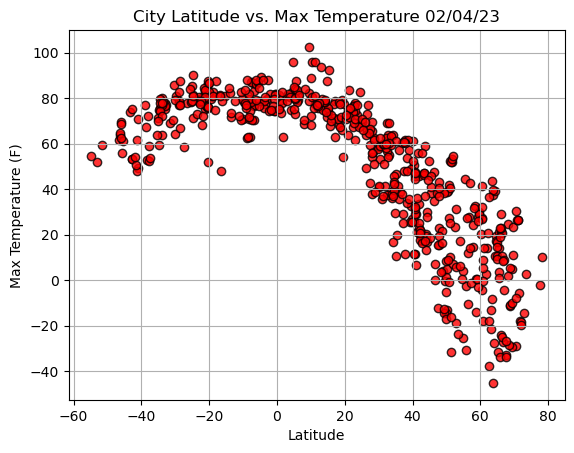

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, color="red", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

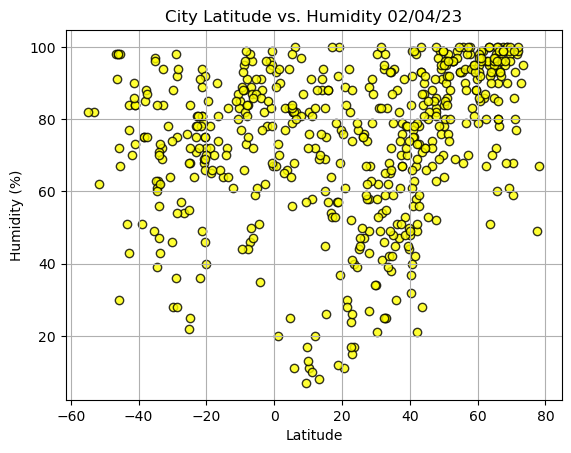

In [22]:
# Build the scatter plot for latitude vs. max humidity.
plt.scatter(lats, humidity, color="yellow", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

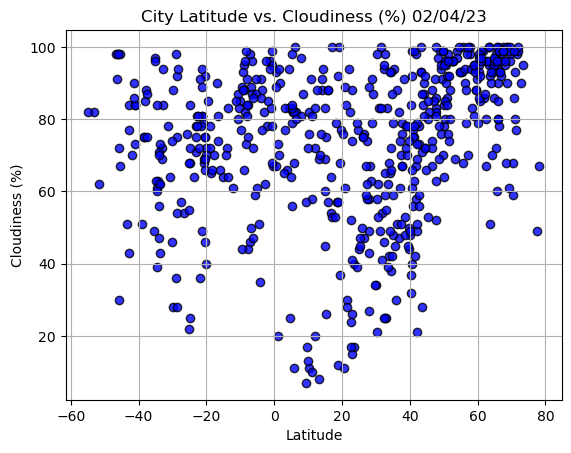

In [24]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, humidity, color="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

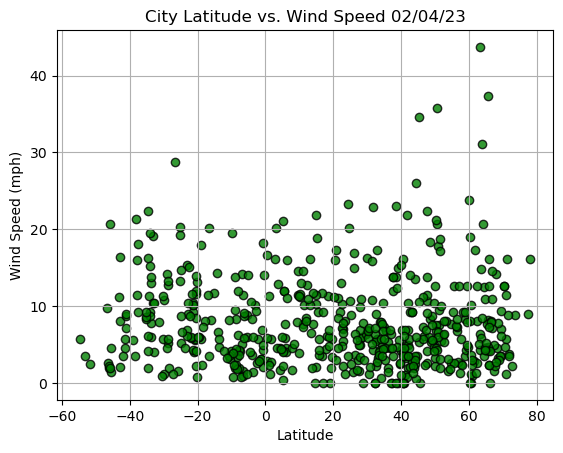

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed, color="green", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                   Carutapera
Country                        BR
Date          2023-02-02 12:03:04
Lat                        -1.195
Lng                        -46.02
Max Temp                    74.82
Humidity                       96
Cloudiness                    100
Wind Speed                   3.09
Name: 13, dtype: object

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Northam,GB,2023-02-02 12:03:00,51.0333,-4.2167,52.39,96,100,17.76
1,Clyde River,CA,2023-02-02 12:03:00,70.4692,-68.5914,-28.97,68,75,12.66
2,Barrow,US,2023-02-02 12:03:00,71.2906,-156.7887,-5.78,77,0,16.11
5,Kyra,RU,2023-02-02 12:03:01,49.5776,111.9753,-0.24,91,77,5.64
6,Umm Lajj,SA,2023-02-02 12:03:02,25.0213,37.2685,69.57,44,4,10.67


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

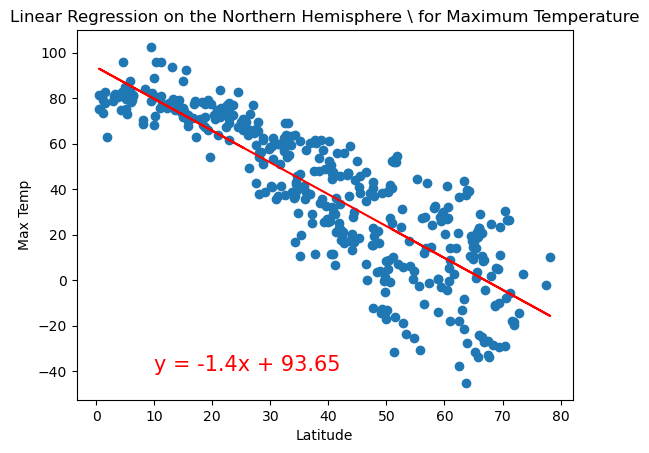

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,-40))

In [45]:
# Check the r-values for our plots
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)


LinregressResult(slope=-1.39830338566784, intercept=93.65072401531344, rvalue=-0.8492069621170683, pvalue=4.8933707609958886e-111, stderr=0.043860642904085506, intercept_stderr=1.938414120850373)

In [46]:
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")


y = -1.4x + 93.65
The p-value is: 0.000


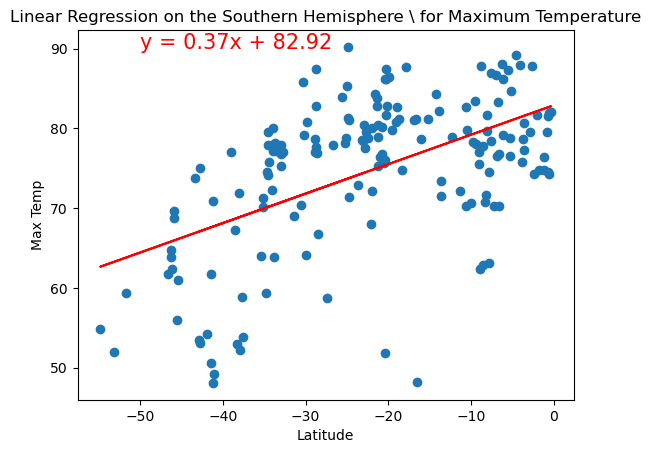

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

In [42]:
# Check the r-values for our plots
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)


LinregressResult(slope=0.3697879302783074, intercept=82.91572986817641, rvalue=0.534748626511756, pvalue=4.929830517212097e-14, stderr=0.04494922005967299, intercept_stderr=1.1666813683154222)

In [39]:
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")


y = 0.37x + 82.92
The p-value is: 0.000


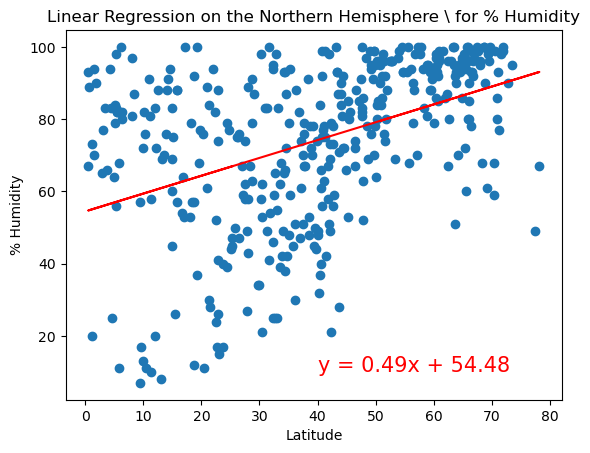

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

In [52]:
# Check the r-values for our plots
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)


LinregressResult(slope=0.49338541737991853, intercept=54.47945396288169, rvalue=0.4282527855063372, pvalue=4.762087980092292e-19, stderr=0.052516334535885126, intercept_stderr=2.320951032621083)

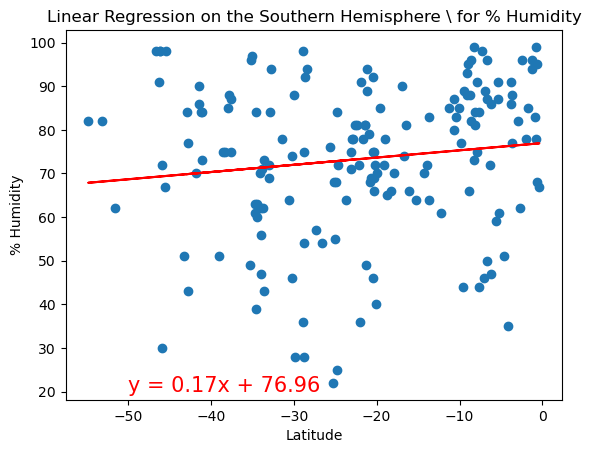

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,20))

In [50]:
# Check the r-values for our plots
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)


LinregressResult(slope=0.16586616440911398, intercept=76.9628977637159, rvalue=0.13129227318065698, pvalue=0.08695306054344946, stderr=0.09633842335230534, intercept_stderr=2.5005159917970716)

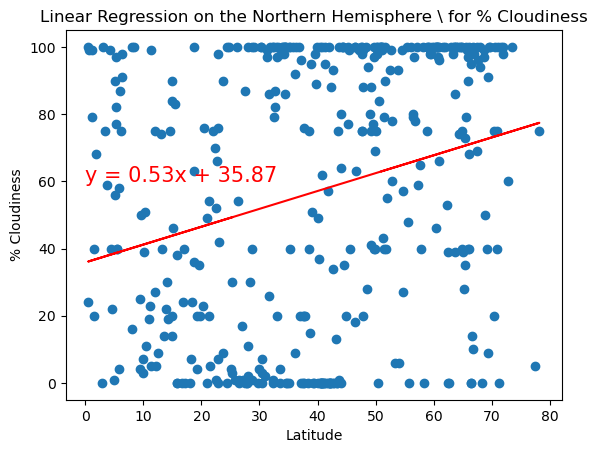

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness',(0,60))

In [59]:
# Check the r-values for our plots
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.5312044327752444, intercept=35.8674841559253, rvalue=0.2633302883994172, pvalue=1.0901054592388635e-07, stderr=0.09816563082873532, intercept_stderr=4.338414404839484)

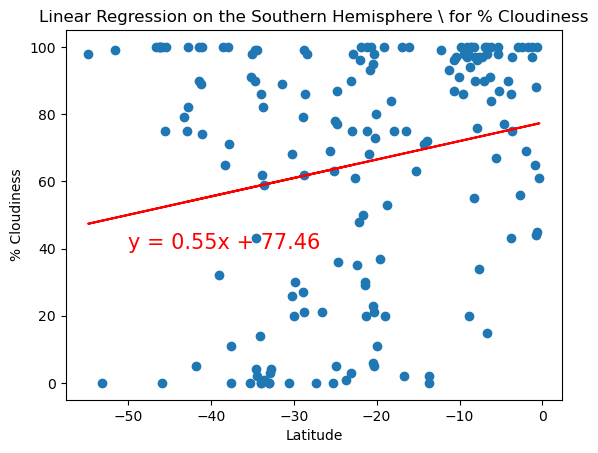

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,40))

In [62]:
# Check the r-values for our plots
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.5489168727771627, intercept=77.46153958990584, rvalue=0.21014376667997944, pvalue=0.005803103744895371, stderr=0.1964442062871211, intercept_stderr=5.09881584339915)

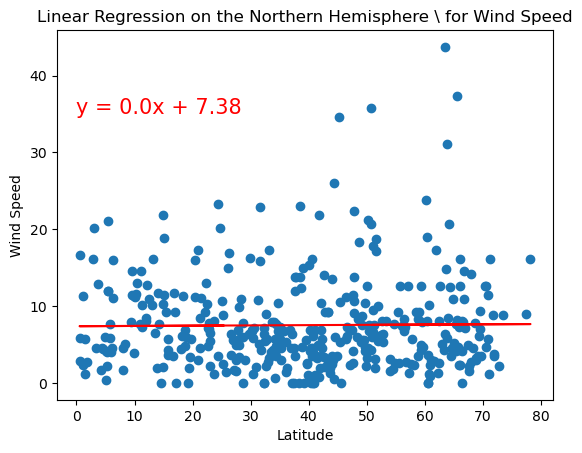

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed',(0,35))

In [65]:
# Check the r-values for our plots
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.003561239671248027, intercept=7.380744056063935, rvalue=0.011441731370908505, pvalue=0.8206673977224431, stderr=0.015699461313950218, intercept_stderr=0.6938351899504552)

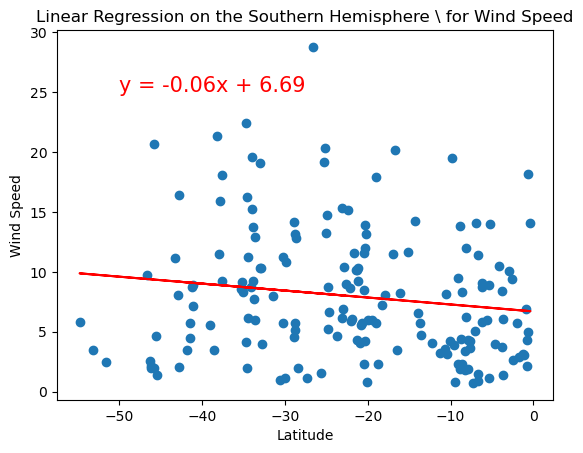

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-50,25))

In [68]:
# Check the r-values for our plots
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.058055938268943556, intercept=6.693217037040368, rvalue=-0.1487611655973905, pvalue=0.052154623607504245, stderr=0.029686179588890874, intercept_stderr=0.7705208806036073)